In [48]:
# data analysis and wrangling
import numpy as pd
import pandas as pd
train=pd.read_csv("E:\\vipin\\Data Science\\pratice_dataset\\titanic\\titanic_train.csv")
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [51]:
test=pd.read_csv("E:\\vipin\\Data Science\\pratice_dataset\\titanic\\titanic_test.csv")
test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN


In [47]:
combine=[train,test]

In [4]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [5]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 

In [6]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# Which features are categorical?

# These values classify the samples into sets of similar samples.Within categorical features are the values
#nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

# Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

In [8]:
#Which features are numerical?

#Which features are numerical? These values change from sample to sample.Within numerical features are the values
#discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

#Continous: Age, Fare. Discrete: SibSp, Parch.


In [9]:
# checking null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train.shape

(891, 12)

In [12]:
#What is the distribution of numerical feature values across the samples?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# What is the distribution of categorical features?
train.describe(include=["object"])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Corn, Mr. Harry",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [14]:
# train.describe(include=["O"])

In [15]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


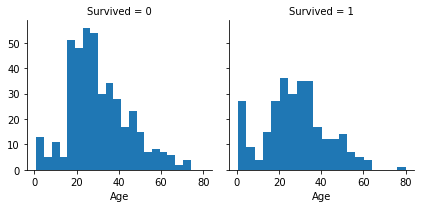

In [19]:
# Analyze by visualizing data
age_survived=sns.FacetGrid(train,col="Survived").map(plt.hist,"Age",bins=20)

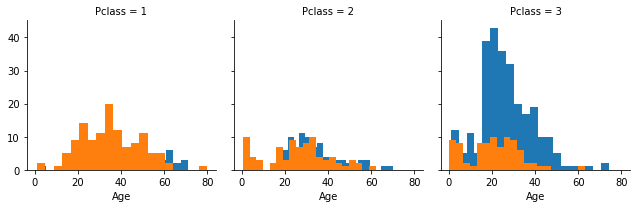

In [20]:
pclass_survived = sns.FacetGrid(train, col='Pclass', hue='Survived').map(plt.hist,"Age",bins=20)

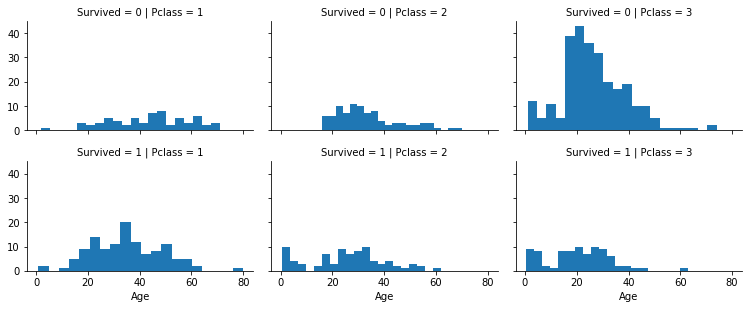

In [21]:
pclass_survived=sns.FacetGrid(train,col='Pclass',row='Survived',size=2.2,aspect=1.6).map(plt.hist,"Age",bins=20).add_legend

C:\Users\bhuppi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\bhuppi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


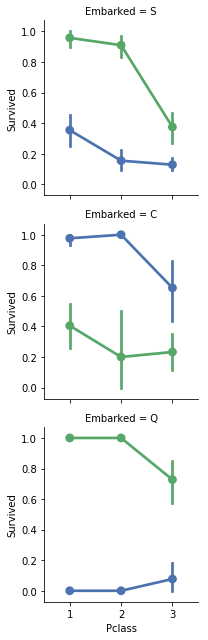

In [22]:
Embarked_survived=sns.FacetGrid(train,row="Embarked").map(sns.pointplot,'Pclass','Survived', 'Sex',palette='deep').add_legend

C:\Users\bhuppi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


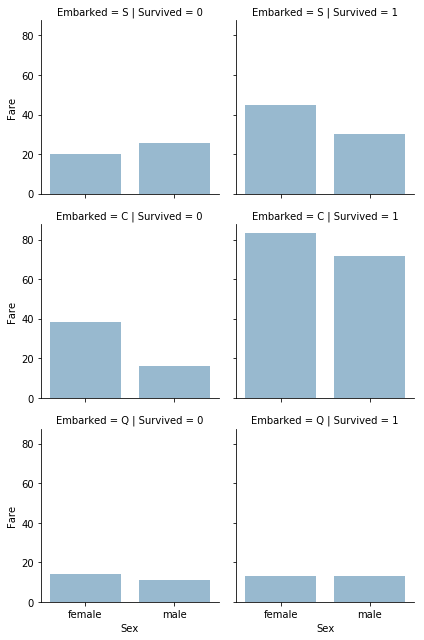

In [23]:
Embarked_survived=sns.FacetGrid(train,row="Embarked",col='Survived').map(sns.barplot,"Sex","Fare",alpha=.5, ci=None).add_legend

In [24]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
train[train.Survived==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [26]:
train[(train.Fare==0) & (train.Survived==0)].Sex.value_counts()

male    14
Name: Sex, dtype: int64

In [27]:
train[(train.Sex=="female") &(train.SibSp==0)].Sex.value_counts()

female    174
Name: Sex, dtype: int64

In [28]:
train[(train.Sex=="male") &(train.SibSp==0)].Sex.value_counts()

male    434
Name: Sex, dtype: int64

In [29]:
train[(train.Sex=="female") &(train.SibSp==1)].Sex.value_counts()

female    106
Name: Sex, dtype: int64

In [30]:
train[(train.Sex=="male") &(train.SibSp==1)].Sex.value_counts()

male    103
Name: Sex, dtype: int64

In [31]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['ticket', 'cabin'], axis=1)
test = test.drop(['ticket', 'cabin'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape, combine[0].shape, combine[1].shape)

Before (850, 15) (459, 14) (850, 15) (459, 14)
After (850, 13) (459, 12) (850, 13) (459, 12)
